In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pyemd import emd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/vladimir/ML/data/drilling_data.csv')
data['Буровая площадка'] = np.random.randint(6, size=2237)
data.head(10)

,Дата,Начало (время),Окончание (время),Длительность (мин),Глубина долота на начало операции,Глубина долота на окончание операции,Количество свечей,Нагрузка на долото,Обороты ротора/ВСП,Момент на роторе/ВСП,...,Давление на входе,Плотность на входе,Момент на ключе,Глубина забоя,Расход на выходе,Давление на выходе,Глубина забоя на начало операции,Глубина забоя на окончание операции,Операция,Буровая площадка
0,2021-04-02,00:32:35,00:32:50,0.25,1562.97,1562.97,60,8.74,0.89,-0.03,...,98.24,1.15,0.0,1563.23,40.45,-1.63,1563.23,1563.23,1,2
1,2021-04-02,00:32:50,00:33:20,0.50,1562.97,1563.03,60,0.17,4.63,1.08,...,-1.47,1.15,0.0,1563.23,4.18,-1.63,1563.23,1563.23,6,3
2,2021-04-02,00:33:20,00:36:10,2.83,1563.03,1563.01,61,0.00,7.82,0.77,...,-0.94,1.15,0.0,1563.23,0.00,-1.63,1563.23,1563.23,7,5
3,2021-04-02,00:36:20,00:36:26,0.10,1562.71,1562.71,61,0.00,0.89,-0.03,...,0.38,1.15,0.0,1563.23,0.19,-1.63,1563.23,1563.23,6,5
4,2021-04-02,00:36:26,00:40:46,4.33,1562.71,1562.62,61,0.00,0.94,-0.01,...,135.30,1.15,0.0,1563.23,41.47,-1.63,1563.23,1563.23,1,0
5,2021-04-02,00:40:46,00:41:08,0.37,1562.62,1560.95,61,0.00,0.89,-0.03,...,149.23,1.15,0.0,1563.23,45.56,-1.63,1563.23,1563.23,3,0
6,2021-04-02,00:41:08,00:41:37,0.48,1560.95,1562.13,61,10.20,0.88,-0.03,...,150.14,1.15,0.0,1563.23,45.49,-1.63,1563.23,1563.23,2,4
7,2021-04-02,00:42:30,00:45:19,2.82,1563.25,1564.38,61,11.95,0.93,0.03,...,152.04,1.15,0.0,1564.13,45.40,-1.63,1563.25,1564.43,4,3
8,2021-04-02,00:45:19,00:45:29,0.17,1564.38,1564.04,61,2.13,0.88,-0.02,...,147.82,1.15,0.0,1564.43,45.51,-1.63,1564.43,1564.43,3,3
9,2021-04-02,00:45:29,00:45:50,0.35,1564.04,1564.43,61,5.34,0.88,-0.02,...,147.26,1.15,0.0,1564.43,45.30,-1.63,1564.43,1564.43,2,4


In [3]:
data.isnull().sum()

Дата                                    0
Начало (время)                          0
Окончание (время)                       0
Длительность (мин)                      0
Глубина долота на начало операции       0
Глубина долота на окончание операции    0
Количество свечей                       0
Нагрузка на долото                      0
Обороты ротора/ВСП                      0
Момент на роторе/ВСП                    0
Расход на входе                         0
Давление на входе                       0
Плотность на входе                      0
Момент на ключе                         0
Глубина забоя                           0
Расход на выходе                        0
Давление на выходе                      0
Глубина забоя на начало операции        0
Глубина забоя на окончание операции     0
Операция                                0
Буровая площадка                        0
dtype: int64

<AxesSubplot:title={'center':'Fig.1. Mean values of drilling features measurements'}>

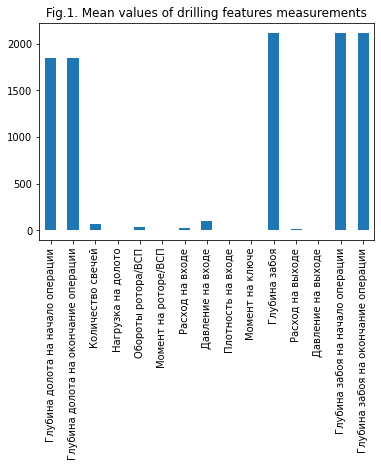

In [4]:
gtr_features = ['Глубина долота на начало операции', 'Глубина долота на окончание операции',
             'Количество свечей', 'Нагрузка на долото', 'Обороты ротора/ВСП', 'Момент на роторе/ВСП', 'Расход на входе', 'Давление на входе', 'Плотность на входе', 
             'Момент на ключе', 'Глубина забоя', 'Расход на выходе', 'Давление на выходе',
             'Глубина забоя на начало операции', 'Глубина забоя на окончание операции']
feature_vectors = data[gtr_features]
feature_vectors.mean().plot(kind='bar',title='Fig.1. Mean values of drilling features measurements')

In [5]:
box_pal = sns.color_palette(['turquoise','darkcyan'])

def plot_boxplots(data):
    fig, axes = plt.subplots(data.shape[1],1)
    fig.set_figheight(13)
    fig.set_figwidth(8)
    for c in range(data.shape[1]):
        axes[c] = sns.boxplot(data = data[data.columns[c]],
                              ax = axes[c],palette = box_pal,orient='h'
                              ,fliersize=10).set_title(data[data.columns[c]].name)
    plt.tight_layout()

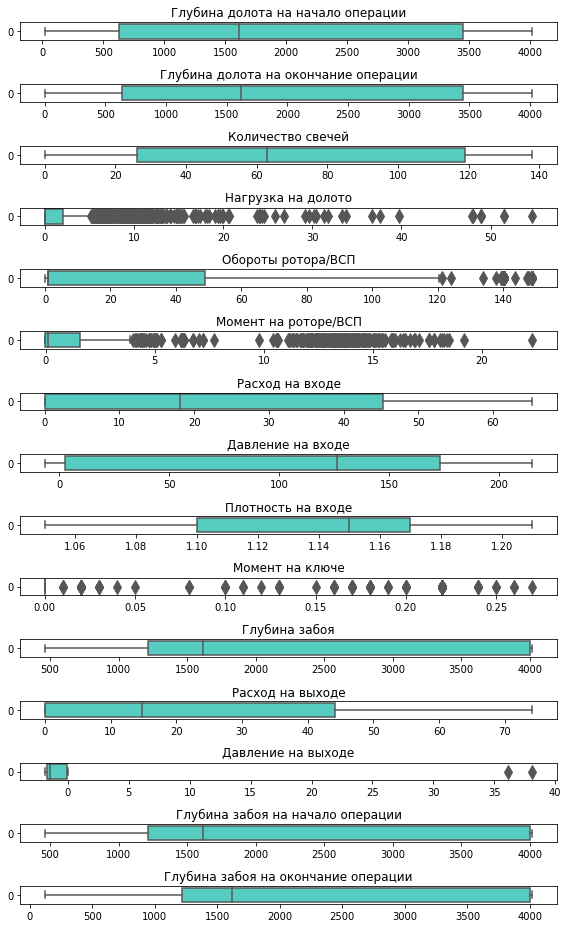

In [6]:
plot_boxplots(feature_vectors)

In [7]:
data['Операция'].value_counts()

1    622
2    584
3    430
4    201
5    181
6    173
8     25
7     21
Name: Операция, dtype: int64

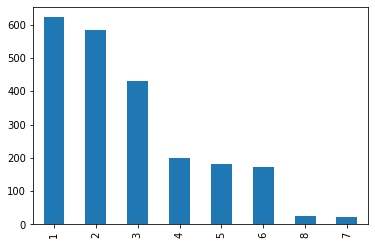

In [8]:
data['Операция'].value_counts().plot(kind='bar');

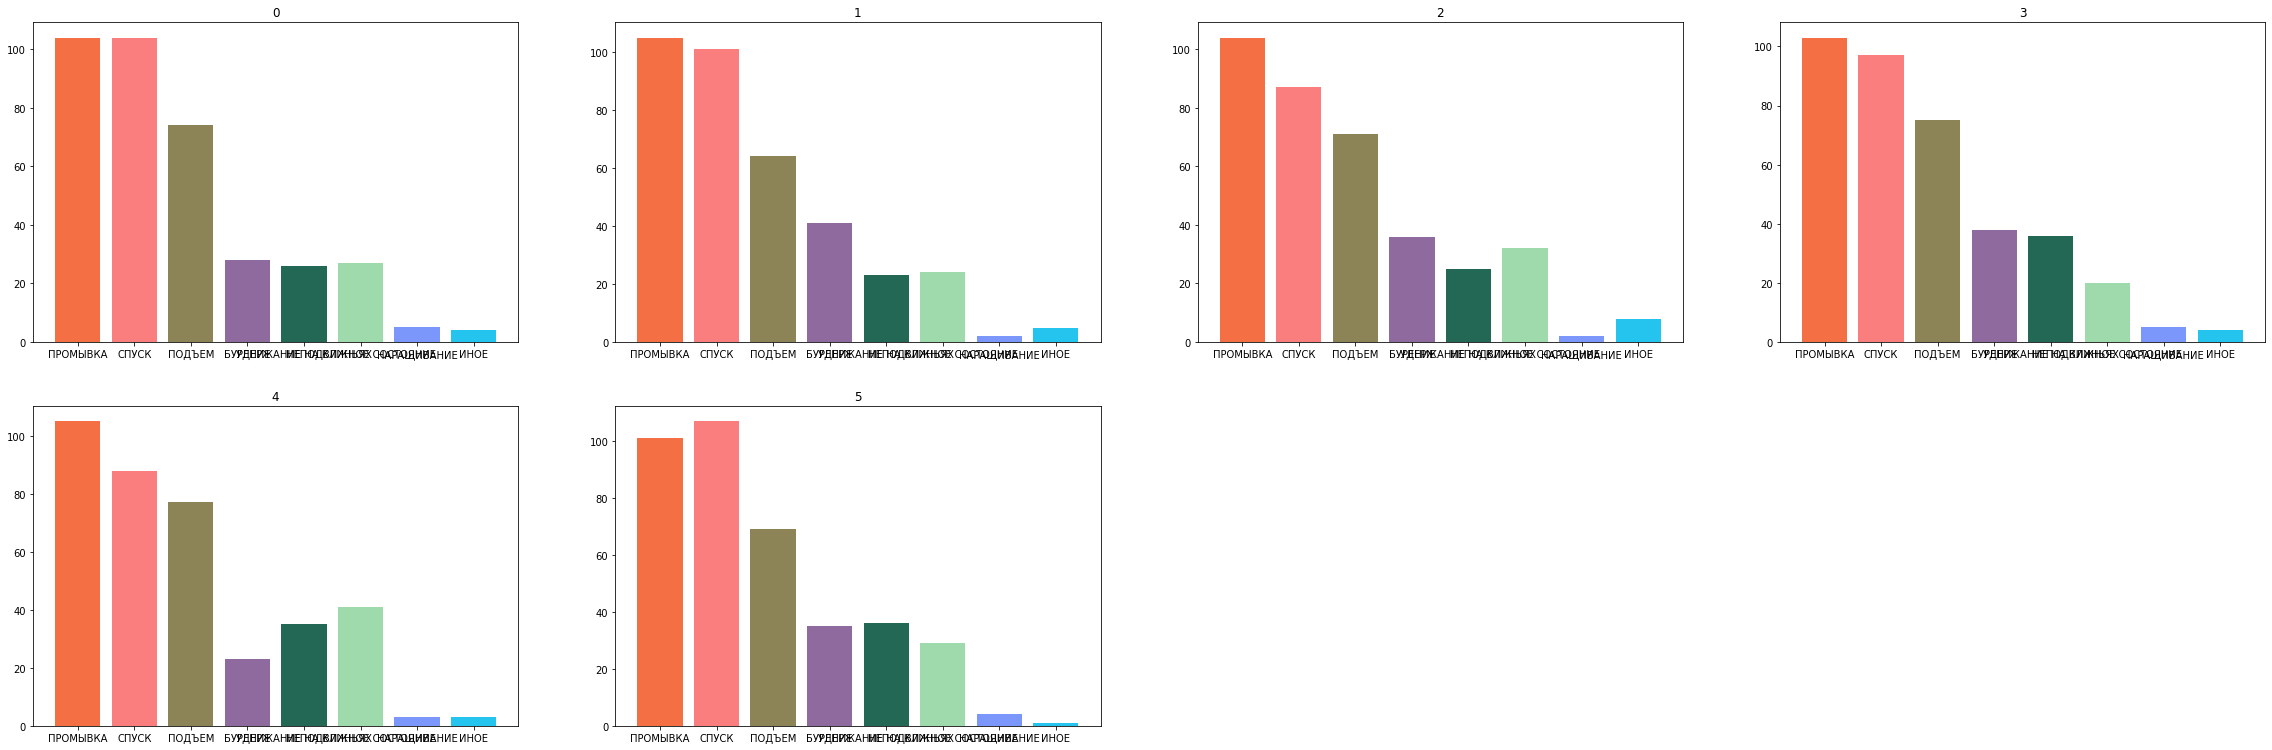

In [10]:
# Let's look at the distribution of drilling in different wells
group_names = ['ПРОМЫВКА', 'СПУСК', 'ПОДЪЕМ', 'БУРЕНИЕ', 'УДЕРЖАНИЕ НА КЛИНЬЯХ', 'НЕПОДВИЖНОЕ СОСТОЯНИЕ', 'НАРАЩИВАНИЕ', 'ИНОЕ']
group_colors = ['#F56F45', '#FA7E7E','#8C8456','#8F6A9E', '#226854','#9EDAAB', '#7C97FC', '#25C4EF'] 
well = data['Буровая площадка'].values
operations_numb = data['Операция'].values

plt.figure(figsize=(40,20))

for i, wn in enumerate(np.unique(well)):
    ax = plt.subplot(3, 4, i+1)
    hist = np.histogram(operations_numb[well == wn], bins=np.arange(9)+.7)
    plt.bar(np.arange(len(hist[0])), hist[0], color=group_colors, align='center')
    ax.set_title(wn)
    ax.set_xticks(np.arange(len(hist[0])))
    ax.set_xticklabels(group_names)
# Скважина ??? содержит все имеющиеся классы (буровые операции), поэтому в дальнейшем при  классификации 
# эта скважина будет сипользоваться в качестве тестовой

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler, PowerTransformer

In [12]:
def combine_dataframe(df,norm):
    return pd.DataFrame(norm.fit_transform(df))

In [14]:
data_ss = combine_dataframe(feature_vectors,StandardScaler())
data_mm = combine_dataframe(feature_vectors,MinMaxScaler())
data_qt = combine_dataframe(feature_vectors,QuantileTransformer())

data_rs = combine_dataframe(feature_vectors,RobustScaler())

data_pt = combine_dataframe(feature_vectors,PowerTransformer(method='yeo-johnson',standardize=True))

In [22]:
base = '/home/vladimir/ML/data/out/'
data_ss.to_csv(base + 'data_ss.csv', index=False)
data_mm.to_csv(base + 'data_mm.csv', index=False)
data_qt.to_csv(base + 'data_qt.csv', index=False)
data_rs.to_csv(base + 'data_rs.csv', index=False)
data_pt.to_csv(base + 'data_pt.csv', index=False)